# Notebook imports and packages 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

$f(x) = x^2 + x + 1$

In [4]:
def f(x):
    return x**2 + x + 1

In [8]:
X = np.linspace(start=-3, stop=3, num=100)

<class 'numpy.ndarray'>


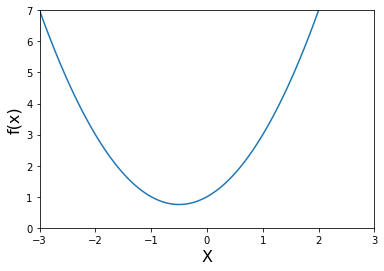

In [16]:
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.xlim([-3, 3])
plt.ylim([0, 7])
plt.plot(X, f(X))
plt.show()

## Slopes and Derivatives


In [18]:
def df(x):
    return 2*x + 1

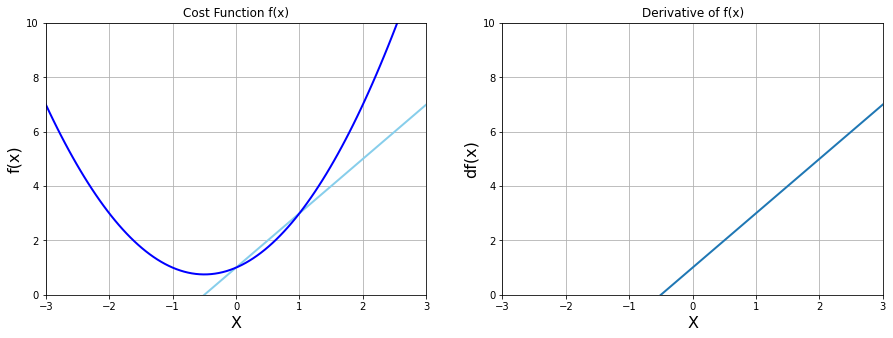

In [40]:
plt.figure(figsize=[15, 5])
plt.subplot(1, 2, 1)
plt.grid()
plt.title('Cost Function f(x)')
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.xlim([-3, 3])
plt.ylim([0, 10])
plt.plot(X, df(X), color='skyblue', linewidth=2)
plt.plot(X, f(X), color='blue', linewidth=2)

plt.subplot(1, 2, 2)
plt.grid()
plt.title('Derivative of f(x)')
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.xlim([-3, 3])
plt.ylim([0, 10])
plt.plot(X, df(X), linewidth=2)
plt.show()